<a href="https://colab.research.google.com/github/gifekn/PRODIGY_ML_01/blob/main/Prodigy_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prodigy_ML_Task-01

1.Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [4]:
Features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
Target = 'SalePrice'

In [5]:
X = df[Features]
y = df[Target]


In [ ]:
X['TotalBaths'] = X['FullBath'] + 0.5 * X['HalfBath']
X = X.drop(['FullBath', 'HalfBath'], axis=1)

In [7]:

print("Features:")
print(X)
print("Target:")
print(y)


Features:
      GrLivArea  BedroomAbvGr  TotalBaths
0          1710             3         2.5
1          1262             3         2.0
2          1786             3         2.5
3          1717             3         1.0
4          2198             4         2.5
...         ...           ...         ...
1455       1647             3         2.5
1456       2073             3         2.0
1457       2340             4         2.0
1458       1078             2         1.0
1459       1256             3         1.5

[1460 rows x 3 columns]
Target:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


#Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1168, 3)
Testing set shape: (292, 3)


#Training the Linear Regression model on the Training set

In [11]:

from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [13]:

print("Model trained successfully.")

Model trained successfully.


#Predicting the Test set results

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [17]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print("Model Coefficients:")
print(coefficients)
print("Intercept:", regressor.intercept_)



Model Coefficients:
        Feature   Coefficient
0     GrLivArea    111.825055
1  BedroomAbvGr -28566.268271
2    TotalBaths  25330.981363
Intercept: 48750.95912800907


In [18]:
print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Model Evaluation:
Mean Squared Error: 3415334823.3982763
Root Mean Squared Error: 58440.866039084984
R-squared Score: 0.5054432341854288


In [20]:
import seaborn as sns


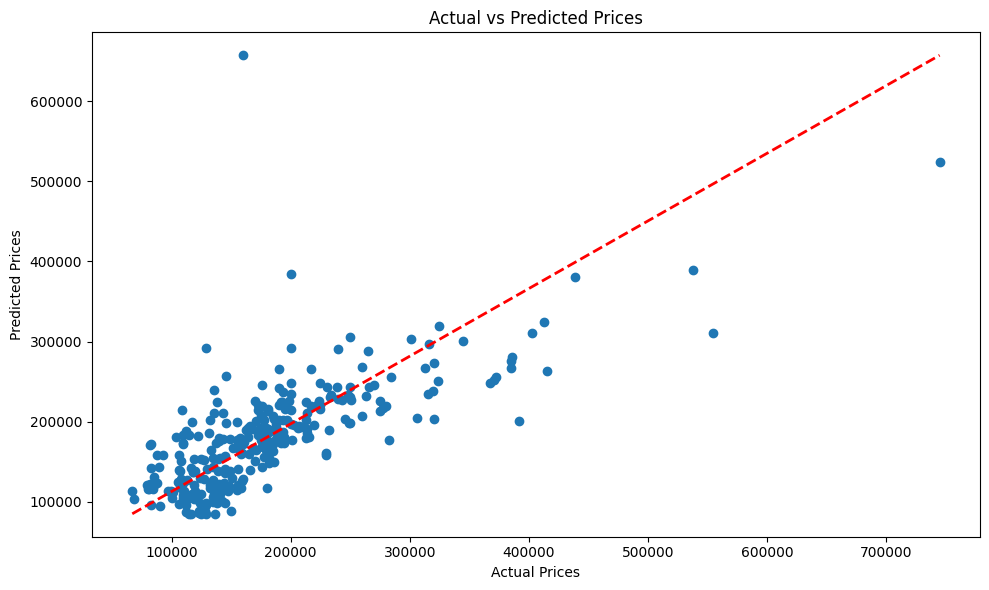

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r--', lw=2)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()


In [21]:
example_house = pd.DataFrame({
    'GrLivArea': [1500, 2000, 2500],
    'BedroomAbvGr': [3, 4, 5],
    'TotalBaths': [2, 2.5, 3]
})

example_predictions = regressor.predict(example_house)

In [22]:
print("Example Predictions:")
for i, (_, house) in enumerate(example_house.iterrows()):
    print(f"House {i+1}:")
    print(f"  Area: {house['GrLivArea']} sq ft")
    print(f"  Bedrooms: {house['BedroomAbvGr']}")
    print(f"  Bathrooms: {house['TotalBaths']}")
    print(f"  Predicted Price: ${example_predictions[i]:,.2f}")
    print()

Example Predictions:
House 1:
  Area: 1500.0 sq ft
  Bedrooms: 3.0
  Bathrooms: 2.0
  Predicted Price: $181,451.70

House 2:
  Area: 2000.0 sq ft
  Bedrooms: 4.0
  Bathrooms: 2.5
  Predicted Price: $221,463.45

House 3:
  Area: 2500.0 sq ft
  Bedrooms: 5.0
  Bathrooms: 3.0
  Predicted Price: $261,475.20

